In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [2]:
tritles = pd.read_csv('../data/trigram_titles_pos_w2v.csv')

In [3]:
tritles.head()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec
0,all's well,1,"['DT', 'POS', 'NN']",DT,POS,NN,"['all', ""'s"", 'well']",[[-1.81372836e-01 1.97823837e-01 -7.73134887e...
1,the devil drives,1,"['DT', 'NN', 'NNS']",DT,NN,NNS,"['the', 'devil', 'drives']",[[-9.59224224e-01 1.22396159e+00 -6.39906406e...
2,edge of hazard,1,"['NN', 'IN', 'NN']",NN,IN,NN,"['edge', 'of', 'hazard']",[[-2.87398398e-02 -7.36244917e-02 1.42647075e...
3,a mingled yarn,1,"['DT', 'VBN', 'NN']",DT,VBN,NN,"['a', 'mingled', 'yarn']",[[ 3.78270075e-03 3.85284066e-01 -8.90050769e...
4,love is enough,1,"['NN', 'VBZ', 'JJ']",NN,VBZ,JJ,"['love', 'is', 'enough']",[[-6.29614413e-01 -7.17607141e-01 -1.16408551e...


`tritles.word_vec` is an array that contains three 200-dimension word vectors for each word in the title, and it is saved as a string in the DataFrame (an artifact of saving the df as a csv). Below I will tranform it into a 600 dimenion vectors of all three vectors.

In [4]:
result = tritles['word_vec'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))
len(result[0])

600

In [5]:
tritles['result'] = result

Make dummy variables for the POS tags and create a single array for the set of dummy variables. Create two lists: `all_pos` and `dp1_pos` in which we drop the first category for `pos1`, `pos2`, `pos3`

In [12]:
tritles_pos = tritles[['pos1', 'pos2', 'pos3']]
tritles_pos = pd.get_dummies(tritles_pos, prefix=['pos1', 'pos2', 'pos3'], columns=['pos1', 'pos2', 'pos3'])

print('tritles_pos.shape:', tritles_pos.shape)

tritles_pos.shape: (389, 81)


In [25]:
tritles_pos.sample()

,pos1_CC,pos1_CD,pos1_DT,pos1_EX,pos1_IN,pos1_JJ,pos1_JJR,pos1_JJS,pos1_MD,pos1_NN,...,pos3_TO,pos3_VB,pos3_VBD,pos3_VBG,pos3_VBN,pos3_VBP,pos3_VBZ,pos3_WDT,pos3_WP$,pos3_WRB
99,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [178]:
print(tritles_pos.columns)

Index(['pos1_CC', 'pos1_CD', 'pos1_DT', 'pos1_EX', 'pos1_IN', 'pos1_JJ',
       'pos1_JJR', 'pos1_JJS', 'pos1_MD', 'pos1_NN', 'pos1_NNS', 'pos1_PRP',
       'pos1_PRP$', 'pos1_RB', 'pos1_RBR', 'pos1_TO', 'pos1_VB', 'pos1_VBD',
       'pos1_VBG', 'pos1_VBN', 'pos1_VBP', 'pos1_VBZ', 'pos1_WDT', 'pos1_WP$',
       'pos1_WRB', 'pos2_,', 'pos2_.', 'pos2_CC', 'pos2_CD', 'pos2_DT',
       'pos2_EX', 'pos2_IN', 'pos2_JJ', 'pos2_JJR', 'pos2_JJS', 'pos2_MD',
       'pos2_NN', 'pos2_NNS', 'pos2_POS', 'pos2_PRP', 'pos2_PRP$', 'pos2_RB',
       'pos2_RBR', 'pos2_RBS', 'pos2_RP', 'pos2_TO', 'pos2_VB', 'pos2_VBD',
       'pos2_VBG', 'pos2_VBN', 'pos2_VBP', 'pos2_VBZ', 'pos2_WDT', 'pos2_WRB',
       'pos3_,', 'pos3_.', 'pos3_CC', 'pos3_CD', 'pos3_DT', 'pos3_IN',
       'pos3_JJ', 'pos3_JJR', 'pos3_MD', 'pos3_NN', 'pos3_NNS', 'pos3_POS',
       'pos3_PRP', 'pos3_PRP$', 'pos3_RB', 'pos3_RBR', 'pos3_RBS', 'pos3_TO',
       'pos3_VB', 'pos3_VBD', 'pos3_VBG', 'pos3_VBN', 'pos3_VBP', 'pos3_VBZ',
       'pos

In [28]:
all_pos = tritles_pos.values.tolist()
print('all_pos list of lists length:', len(all_pos))
print('length of inner lists aka number of pos tags:', len(all_pos[0]))

all_pos list of lists length: 389
length of inner lists aka number of pos tags: 81


In [29]:
tritles_pos2 = tritles[['pos1', 'pos2', 'pos3']]
tritles_pos2 = pd.get_dummies(tritles_pos2, prefix=['pos1', 'pos2', 'pos3'], columns=['pos1', 'pos2', 'pos3'], drop_first=True)

print('tritles_pos2.shape:', tritles_pos2.shape)

tritles_pos2.shape: (389, 78)


In [180]:
print(tritles_pos2.columns)

Index(['pos1_CD', 'pos1_DT', 'pos1_EX', 'pos1_IN', 'pos1_JJ', 'pos1_JJR',
       'pos1_JJS', 'pos1_MD', 'pos1_NN', 'pos1_NNS', 'pos1_PRP', 'pos1_PRP$',
       'pos1_RB', 'pos1_RBR', 'pos1_TO', 'pos1_VB', 'pos1_VBD', 'pos1_VBG',
       'pos1_VBN', 'pos1_VBP', 'pos1_VBZ', 'pos1_WDT', 'pos1_WP$', 'pos1_WRB',
       'pos2_.', 'pos2_CC', 'pos2_CD', 'pos2_DT', 'pos2_EX', 'pos2_IN',
       'pos2_JJ', 'pos2_JJR', 'pos2_JJS', 'pos2_MD', 'pos2_NN', 'pos2_NNS',
       'pos2_POS', 'pos2_PRP', 'pos2_PRP$', 'pos2_RB', 'pos2_RBR', 'pos2_RBS',
       'pos2_RP', 'pos2_TO', 'pos2_VB', 'pos2_VBD', 'pos2_VBG', 'pos2_VBN',
       'pos2_VBP', 'pos2_VBZ', 'pos2_WDT', 'pos2_WRB', 'pos3_.', 'pos3_CC',
       'pos3_CD', 'pos3_DT', 'pos3_IN', 'pos3_JJ', 'pos3_JJR', 'pos3_MD',
       'pos3_NN', 'pos3_NNS', 'pos3_POS', 'pos3_PRP', 'pos3_PRP$', 'pos3_RB',
       'pos3_RBR', 'pos3_RBS', 'pos3_TO', 'pos3_VB', 'pos3_VBD', 'pos3_VBG',
       'pos3_VBN', 'pos3_VBP', 'pos3_VBZ', 'pos3_WDT', 'pos3_WP$', 'pos3_WRB'],
     

In [31]:
dp1_pos = tritles_pos2.values.tolist()
print('dp1_pos list of lists length:', len(dp1_pos))
print('length of inner lists aka number of pos tags:', len(dp1_pos[0]))

dp1_pos list of lists length: 389
length of inner lists aka number of pos tags: 78


In [33]:
tritles['all_pos'] = all_pos
tritles['dp1_pos'] = dp1_pos

tritles.sample()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec,result,all_pos,dp1_pos
68,a poor player,1,"['DT', 'JJ', 'NN']",DT,JJ,NN,"['a', 'poor', 'player']",[[ 3.78270075e-03 3.85284066e-01 -8.90050769e...,"[0.00378270075, 0.385284066, -0.890050769, 0.6...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now I need to combine `result` with `all_pos` and `dp1_pos` to create a single list for training.

In [50]:
res_all_df = tritles[['result', 'all_pos']]
res_all = res_all_df.values.tolist()

len(res_all)

389

In [86]:
print('len(res_all[0]):', len(res_all[0]))
print('len(res_all[0][0]):', len(res_all[0][0]))
print('len(res_all[0][1]):', len(res_all[0][1]))
print('type(res_all[0][0]):', type(res_all[0][0]))
print('type(res_all[0][1]):', type(res_all[0][1]))


len(res_all[0]): 2
len(res_all[0][0]): 600
len(res_all[0][1]): 81
type(res_all[0][0]): <class 'numpy.ndarray'>
type(res_all[0][1]): <class 'list'>


In [87]:
new_res_all = []

for i in range(len(res_all)):
    new_res_all.append(list(res_all[i][0]) + res_all[i][1])

In [88]:
print('len(new_res_all):', len(new_res_all))
print('len(new_res_all[0]):', len(new_res_all[0]))

len(new_res_all): 389
len(new_res_all[0]): 681


In [89]:
tritles['res_all'] = new_res_all
tritles.sample()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec,result,all_pos,dp1_pos,res_all
75,rain from heaven,1,"['NN', 'IN', 'NN']",NN,IN,NN,"['rain', 'from', 'heaven']",[[-1.14613073e-02 -1.20824695e-01 7.44598508e...,"[-0.0114613073, -0.120824695, 0.0744598508, -0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[-0.0114613073, -0.120824695, 0.0744598508, -0..."


In [90]:
res_dp1_df = tritles[['result', 'dp1_pos']]
res_dp1 = res_dp1_df.values.tolist()
len(res_dp1)

389

In [91]:
new_res_dp1 = []

for i in range(len(res_dp1)):
    new_res_dp1.append(list(res_dp1[i][0]) + res_dp1[i][1])

print('len(new_res_dp1):', len(new_res_dp1))
print('len(new_res_dp1[0]):', len(new_res_dp1[0]))

len(new_res_dp1): 389
len(new_res_dp1[0]): 678


In [120]:
tritles['res_dp1'] = new_res_dp1
tritles.sample()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec,result,all_pos,dp1_pos,res_all,res_dp1
211,the cordial of,0,"['DT', 'NN', 'IN']",DT,NN,IN,"['the', 'cordial', 'of']",[[-9.59224224e-01 1.22396159e+00 -6.39906406e...,"[-0.959224224, 1.22396159, -0.639906406, -0.51...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.959224224, 1.22396159, -0.639906406, -0.51...","[-0.959224224, 1.22396159, -0.639906406, -0.51..."


Split into training and test sets. Xa is `res_all` and Xd is `res_dp1`. Will use random_state=46 during training to compare the two sets

In [121]:
X = tritles[['title', 'res_all', 'res_dp1']]
X.shape

(389, 3)

In [122]:
y = tritles[['title', 'good_title']]
y.shape

(389, 2)

In [128]:
Xa = X['res_all'].tolist()
Xd = X['res_dp1'].tolist()
y = y['good_title'].to_numpy()

In [129]:
Xa_train, Xa_test, y_train, y_test = train_test_split(Xa, y, test_size=0.25, random_state=46)

print('Xa_train length:', len(Xa_train))
print('Xa_test length:', len(Xa_test))

Xa_train length: 291
Xa_test length: 98


In [130]:
Xd_train, Xd_test, y_train, y_test = train_test_split(Xd, y, test_size=0.25, random_state=46)

print('Xd_train length:', len(Xd_train))
print('Xd_test length:', len(Xd_test))

Xd_train length: 291
Xd_test length: 98


## Gradient Boosting ##

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, plot_confusion_matrix
import matplotlib.pyplot as plt

First with all pos tags

In [150]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=3, max_depth = 3)
    gb.fit(Xa_train, y_train.ravel())
    y_pred = gb.predict(Xa_test)
    print('Learning rate: ', learning_rate)
    print('Accuracy (training): {}'.format(round(gb.score(Xa_train, y_train), 3)))
    print('Accuracy (validation): {}'.format(round(gb.score(Xa_test, y_test), 3)))
    print('Precision: {}'.format(round(precision_score(y_test, y_pred), 3)))
    print('Recall: {}'.format(round(recall_score(y_test, y_pred), 3)))
    print()

Learning rate:  0.05
Accuracy (training): 0.955
Accuracy (validation): 0.867
Precision: 0.878
Recall: 0.86

Learning rate:  0.1
Accuracy (training): 0.948
Accuracy (validation): 0.878
Precision: 0.839
Recall: 0.94

Learning rate:  0.25
Accuracy (training): 0.986
Accuracy (validation): 0.847
Precision: 0.857
Recall: 0.84

Learning rate:  0.5
Accuracy (training): 0.993
Accuracy (validation): 0.878
Precision: 0.88
Recall: 0.88

Learning rate:  0.75
Accuracy (training): 1.0
Accuracy (validation): 0.857
Precision: 0.81
Recall: 0.94

Learning rate:  1
Accuracy (training): 1.0
Accuracy (validation): 0.837
Precision: 0.827
Recall: 0.86



Re-running with a learning rate of 0.5 (I value precision over recall)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        48
           1       0.87      0.94      0.90        50

    accuracy                           0.90        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.90      0.90      0.90        98



<Figure size 432x288 with 0 Axes>

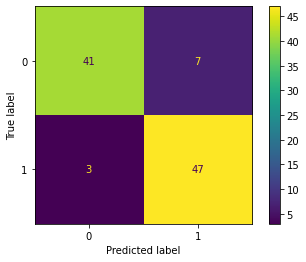

In [154]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=3, max_depth=3)
gb.fit(Xa_train, y_train.ravel())
y_pred = gb.predict(Xa_test)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(gb, Xa_test, y_test)
plt.show()

Next with the first POS categories dropped

In [142]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=3, max_depth = 3)
    gb.fit(Xd_train, y_train.ravel())
    y_pred = gb.predict(Xd_test)
    print('Learning rate: ', learning_rate)
    print('Accuracy (training): {}'.format(round(gb.score(Xd_train, y_train), 3)))
    print('Accuracy (validation): {}'.format(round(gb.score(Xd_test, y_test), 3)))
    print('Precision: {}'.format(round(precision_score(y_test, y_pred), 3)))
    print('Recall: {}'.format(round(recall_score(y_test, y_pred), 3)))
    print()

Learning rate:  0.05
Accuracy (training): 0.959
Accuracy (validation): 0.806
Precision: 0.804
Recall: 0.82

Learning rate:  0.1
Accuracy (training): 0.962
Accuracy (validation): 0.847
Precision: 0.83
Recall: 0.88

Learning rate:  0.25
Accuracy (training): 0.979
Accuracy (validation): 0.878
Precision: 0.865
Recall: 0.9

Learning rate:  0.5
Accuracy (training): 0.997
Accuracy (validation): 0.867
Precision: 0.825
Recall: 0.94

Learning rate:  0.75
Accuracy (training): 1.0
Accuracy (validation): 0.857
Precision: 0.833
Recall: 0.9

Learning rate:  1
Accuracy (training): 1.0
Accuracy (validation): 0.898
Precision: 0.885
Recall: 0.92



With a learning rate of 0.25

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       0.89      0.96      0.92        50

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98



<Figure size 432x288 with 0 Axes>

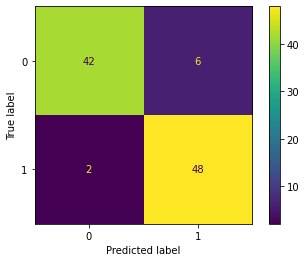

In [155]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.25, max_features=3, max_depth=3)
gb.fit(Xd_train, y_train.ravel())
y_pred = gb.predict(Xd_test)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(gb, Xd_test, y_test)
plt.show()

## SVM ##

In [144]:
from sklearn import svm

First with all pos tags

In [156]:
C_list = [0.01, 0.1, 1, 10, 100]

for C in C_list:
    clf = svm.SVC(C=C, kernel='rbf')
    clf.fit(Xa_train, y_train.ravel())
    y_pred = clf.predict(Xa_test)
    print('Regularization parameter: ', C)
    print('Accuracy (training): {}'.format(round(clf.score(Xa_train, y_train), 3)))
    print('Accuracy (validation): {}'.format(round(clf.score(Xa_test, y_test), 3)))
    print('Precision: {}'.format(round(precision_score(y_test, y_pred), 3)))
    print('Recall: {}'.format(round(recall_score(y_test, y_pred), 3)))
    print()

Regularization parameter:  0.01
Accuracy (training): 0.505
Accuracy (validation): 0.49
Precision: 0.0
Recall: 0.0

Regularization parameter:  0.1


C:\Users\gcn4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (training): 0.849
Accuracy (validation): 0.837
Precision: 0.87
Recall: 0.8

Regularization parameter:  1
Accuracy (training): 0.966
Accuracy (validation): 0.908
Precision: 0.887
Recall: 0.94

Regularization parameter:  10
Accuracy (training): 0.993
Accuracy (validation): 0.918
Precision: 0.904
Recall: 0.94

Regularization parameter:  100
Accuracy (training): 1.0
Accuracy (validation): 0.918
Precision: 0.92
Recall: 0.92



Rerun with C=10

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.90      0.94      0.92        50

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98



<Figure size 432x288 with 0 Axes>

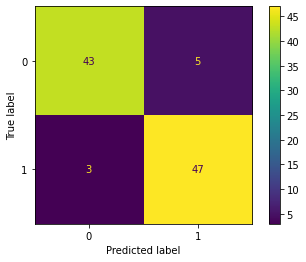

In [157]:
clf = svm.SVC(C=10, kernel='rbf')
clf.fit(Xa_train, y_train.ravel())
y_pred = clf.predict(Xa_test)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(clf, Xa_test, y_test)
plt.show()

Next with the first POS categories dropped

In [159]:
C_list = [0.01, 0.1, 1, 10, 100]

for C in C_list:
    clf = svm.SVC(C=C, kernel='rbf')
    clf.fit(Xd_train, y_train.ravel())
    y_pred = clf.predict(Xd_test)
    print('Regularization parameter: ', C)
    print('Accuracy (training): {}'.format(round(clf.score(Xd_train, y_train), 3)))
    print('Accuracy (validation): {}'.format(round(clf.score(Xd_test, y_test), 3)))
    print('Precision: {}'.format(round(precision_score(y_test, y_pred), 3)))
    print('Recall: {}'.format(round(recall_score(y_test, y_pred), 3)))
    print()

Regularization parameter:  0.01
Accuracy (training): 0.505
Accuracy (validation): 0.49
Precision: 0.0
Recall: 0.0

Regularization parameter:  0.1


C:\Users\gcn4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (training): 0.849
Accuracy (validation): 0.837
Precision: 0.87
Recall: 0.8

Regularization parameter:  1
Accuracy (training): 0.966
Accuracy (validation): 0.908
Precision: 0.887
Recall: 0.94

Regularization parameter:  10
Accuracy (training): 0.993
Accuracy (validation): 0.918
Precision: 0.904
Recall: 0.94

Regularization parameter:  100
Accuracy (training): 1.0
Accuracy (validation): 0.918
Precision: 0.92
Recall: 0.92



Rerun with C=10

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.90      0.94      0.92        50

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98



<Figure size 432x288 with 0 Axes>

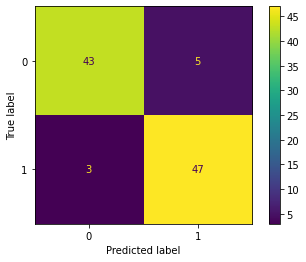

In [160]:
clf = svm.SVC(C=10, kernel='rbf')
clf.fit(Xd_train, y_train.ravel())
y_pred = clf.predict(Xd_test)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(clf, Xd_test, y_test)
plt.show()

There does not seem to be any performance differences between the `res_all` and `res_dp1` sets using a rbf kernel. Let's try a linear kernel

In [164]:
C_list = [0.01, 0.1, 1, 10, 100]

for C in C_list:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(Xa_train, y_train.ravel())
    y_pred = clf.predict(Xa_test)
    print('Regularization parameter: ', C)
    print('Accuracy (training): {}'.format(round(clf.score(Xa_train, y_train), 3)))
    print('Accuracy (validation): {}'.format(round(clf.score(Xa_test, y_test), 3)))
    print('Precision: {}'.format(round(precision_score(y_test, y_pred), 3)))
    print('Recall: {}'.format(round(recall_score(y_test, y_pred), 3)))
    print()

Regularization parameter:  0.01
Accuracy (training): 0.948
Accuracy (validation): 0.918
Precision: 0.904
Recall: 0.94

Regularization parameter:  0.1
Accuracy (training): 0.986
Accuracy (validation): 0.908
Precision: 0.873
Recall: 0.96

Regularization parameter:  1
Accuracy (training): 1.0
Accuracy (validation): 0.878
Precision: 0.852
Recall: 0.92

Regularization parameter:  10
Accuracy (training): 1.0
Accuracy (validation): 0.888
Precision: 0.868
Recall: 0.92

Regularization parameter:  100
Accuracy (training): 1.0
Accuracy (validation): 0.888
Precision: 0.868
Recall: 0.92



              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.90      0.94      0.92        50

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98



<Figure size 432x288 with 0 Axes>

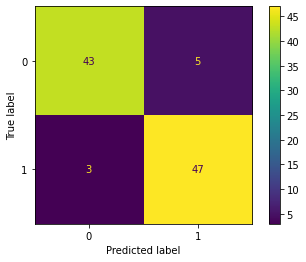

In [165]:
clf = svm.SVC(C=0.01, kernel='linear')
clf.fit(Xa_train, y_train.ravel())
y_pred = clf.predict(Xa_test)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(clf, Xa_test, y_test)
plt.show()

In [166]:
C_list = [0.01, 0.1, 1, 10, 100]

for C in C_list:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(Xd_train, y_train.ravel())
    y_pred = clf.predict(Xd_test)
    print('Regularization parameter: ', C)
    print('Accuracy (training): {}'.format(round(clf.score(Xd_train, y_train), 3)))
    print('Accuracy (validation): {}'.format(round(clf.score(Xd_test, y_test), 3)))
    print('Precision: {}'.format(round(precision_score(y_test, y_pred), 3)))
    print('Recall: {}'.format(round(recall_score(y_test, y_pred), 3)))
    print()

Regularization parameter:  0.01
Accuracy (training): 0.948
Accuracy (validation): 0.918
Precision: 0.904
Recall: 0.94

Regularization parameter:  0.1
Accuracy (training): 0.986
Accuracy (validation): 0.908
Precision: 0.873
Recall: 0.96

Regularization parameter:  1
Accuracy (training): 1.0
Accuracy (validation): 0.878
Precision: 0.852
Recall: 0.92

Regularization parameter:  10
Accuracy (training): 1.0
Accuracy (validation): 0.888
Precision: 0.868
Recall: 0.92

Regularization parameter:  100
Accuracy (training): 1.0
Accuracy (validation): 0.888
Precision: 0.868
Recall: 0.92



              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.90      0.94      0.92        50

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98



<Figure size 432x288 with 0 Axes>

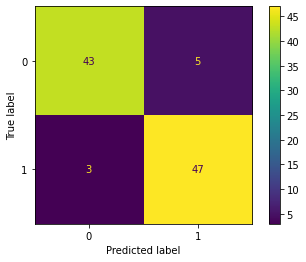

In [167]:
clf = svm.SVC(C=0.01, kernel='linear')
clf.fit(Xd_train, y_train.ravel())
y_pred = clf.predict(Xd_test)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(clf, Xd_test, y_test)
plt.show()

In [171]:
datapath = '../data'

In [173]:
X.sample()

,title,res_all,res_dp1
172,such bitter business,"[-0.149283633, -0.0175612476, -0.453710228, -0...","[-0.149283633, -0.0175612476, -0.453710228, -0..."


In [175]:
y = tritles[['title', 'good_title']]
y.shape

(389, 2)

In [176]:
datapath_X = os.path.join(datapath, 'X_tri.pkl')
X.to_pickle(datapath_X)

datapath_y = os.path.join(datapath, 'y_tri.pkl')
y.to_pickle(datapath_y)

In [177]:
datapath_tritles = os.path.join(datapath, 'tritles.pkl')
tritles.to_pickle(datapath_tritles)